In [ ]:
# Import libraries

import pandas as pd
import numpy as np
import seaborn as sns

import matplotlib.pyplot as plt
import matplotlib.mlab as mlab
import matplotlib
plt.style.use('ggplot')
from matplotlib.pyplot import figure

%matplotlib inline
matplotlib.rcParams['figure.figsize'] = (12,8)

# Now we need to read in the data
df = pd.read_csv(r'C:\Users\Mario\Downloads\movies.csv')

#Let's look at the data

df.head()

In [47]:
# Let's see if there is any missing data

for col in df.columns:
    pct_missing = np.mean(df[col].isnull()) * 100
    print('{} - {}%'.format(col, round(pct_missing, 2)))

name - 0.0%
rating - 0.0%
genre - 0.0%
year - 0.0%
released - 0.0%
score - 0.0%
votes - 0.0%
director - 0.0%
writer - 0.0%
star - 0.0%
country - 0.0%
budget - 0.0%
gross - 0.0%
company - 0.0%
runtime - 0.0%
yearcorrect - 0.0%


In [32]:
# Data types for our columns

df.dtypes

name         object
rating       object
genre        object
year          int64
released     object
score       float64
votes       float64
director     object
writer       object
star         object
country      object
budget      float64
gross       float64
company      object
runtime     float64
dtype: object

In [ ]:
#Change data type of columns

df['budget'] = df['budget'].fillna(0).astype('int64')
df['gross'] = df['gross'].fillna(0).astype('int64')
df['votes'] = df['votes'].fillna(0).astype('int64')

pd.set_option('display.max_rows', None)

df.head()

In [ ]:
#Create correct Year column

df['yearcorrect'] = df['released'].str.extract(pat = '([0-9]{4})').astype('str')

pd.set_option('display.max_rows', None)

df.head()

In [ ]:
df = df.sort_values(by=['gross'], inplace=False, ascending=False)

pd.set_option('display.max_rows', None)

df.head()

In [17]:
# Drop any duplicates

df['company'].drop_duplicates().sort_values(ascending=False)

pd.set_option('display.max_rows', None)

##There are no duplicates, but if there were, we drop them.

In [129]:
df.drop_duplicates

pd.set_option('display.max_rows', None)

In [ ]:
#Budget high correlation
#Company whigh correlation


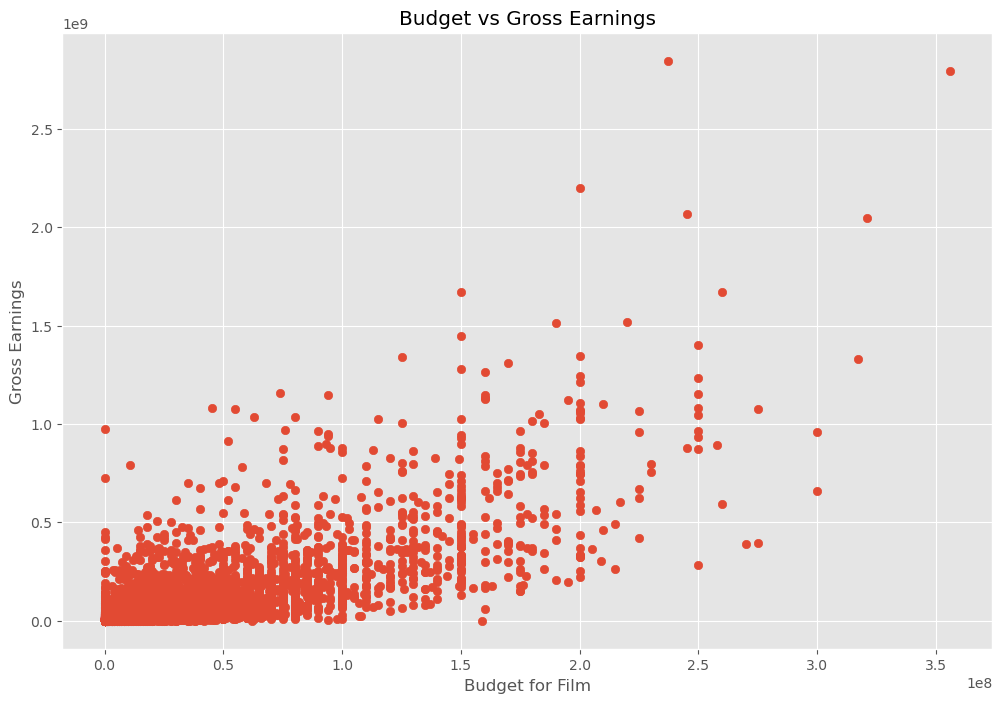

In [19]:
#Scatter plot with budget vs gross

df.fillna(0, inplace=True)

plt.scatter(x=df['budget'], y=df['gross'])

plt.title('Budget vs Gross Earnings')

plt.xlabel('Budget for Film')

plt.ylabel('Gross Earnings')
plt.show()


In [87]:
df.head()

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime,yearcorrect
5445,Avatar,PG-13,Action,2009,"December 18, 2009 (United States)",7.8,1100000.0,James Cameron,James Cameron,Sam Worthington,United States,237000000,2847246203,Twentieth Century Fox,162.0,2009
7445,Avengers: Endgame,PG-13,Action,2019,"April 26, 2019 (United States)",8.4,903000.0,Anthony Russo,Christopher Markus,Robert Downey Jr.,United States,356000000,2797501328,Marvel Studios,181.0,2019
3045,Titanic,PG-13,Drama,1997,"December 19, 1997 (United States)",7.8,1100000.0,James Cameron,James Cameron,Leonardo DiCaprio,United States,200000000,2201647264,Twentieth Century Fox,194.0,1997
6663,Star Wars: Episode VII - The Force Awakens,PG-13,Action,2015,"December 18, 2015 (United States)",7.8,876000.0,J.J. Abrams,Lawrence Kasdan,Daisy Ridley,United States,245000000,2069521700,Lucasfilm,138.0,2015
7244,Avengers: Infinity War,PG-13,Action,2018,"April 27, 2018 (United States)",8.4,897000.0,Anthony Russo,Christopher Markus,Robert Downey Jr.,United States,321000000,2048359754,Marvel Studios,149.0,2018


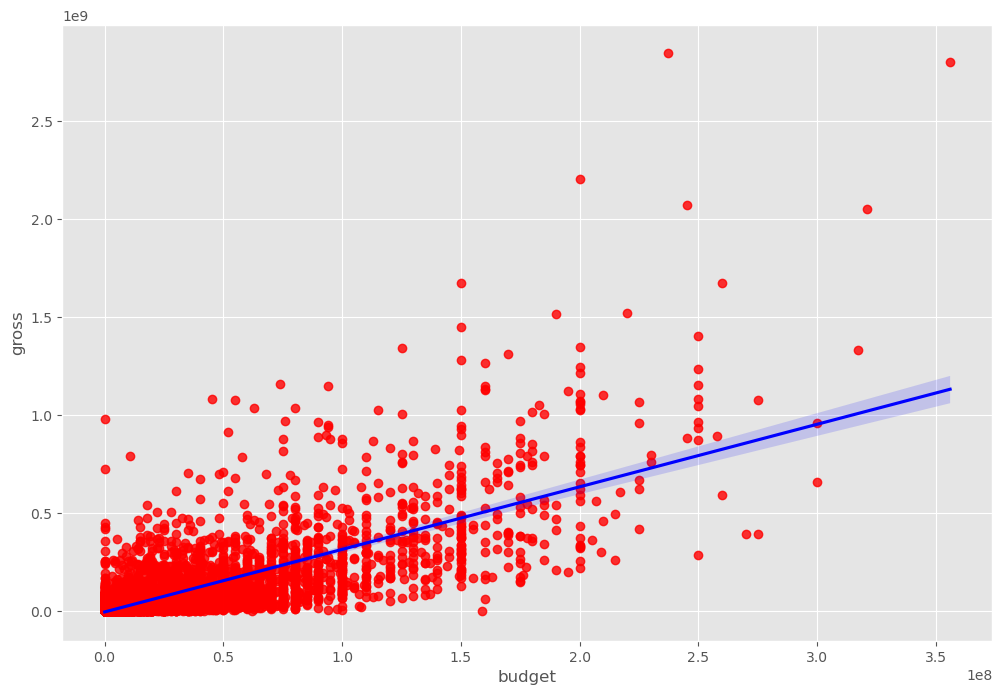

In [152]:
#Plot budget vs gross using seaborn

df.fillna(0, inplace=True)

sns.regplot(x="budget", y="gross", data=df, scatter_kws={"color":"red"}, line_kws={"color":"blue"})

plt.show()

In [25]:
#Let's star looking at correlation

numeric_df = df.select_dtypes(include=['float64', 'int64'])
numeric_df.corr(method='pearson') #pearson, kendall, spearman

,year,score,votes,budget,gross,runtime
year,1.000000,0.092616,0.222427,0.309212,0.261900,0.116358
score,0.092616,1.000000,0.407101,0.056863,0.186012,0.394564
votes,0.222427,0.407101,1.000000,0.486931,0.632870,0.306984
budget,0.309212,0.056863,0.486931,1.000000,0.750157,0.268372
gross,0.261900,0.186012,0.632870,0.750157,1.000000,0.244339
runtime,0.116358,0.394564,0.306984,0.268372,0.244339,1.000000


In [ ]:
# High correlation between budget and gross

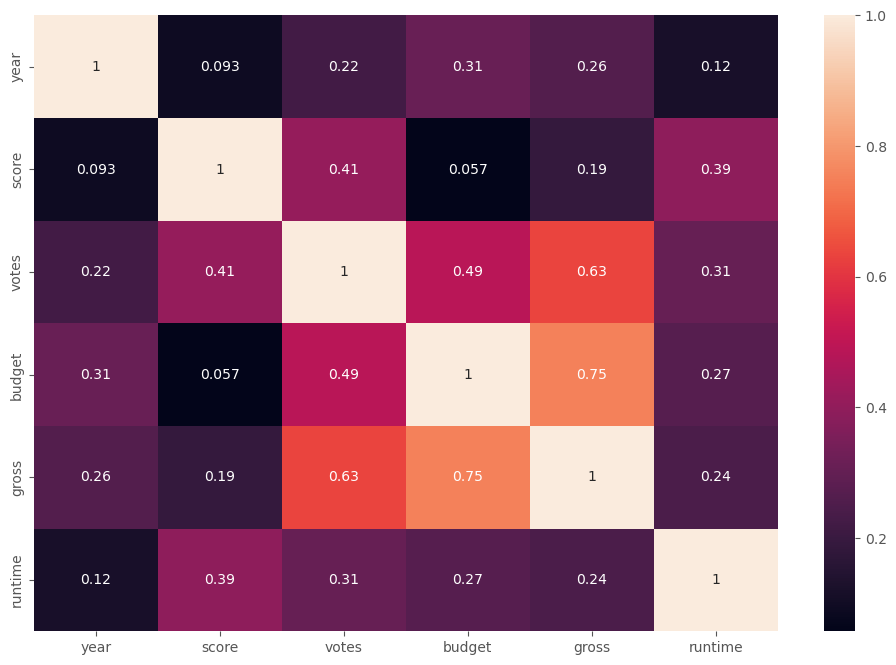

In [35]:
correlation_matrix = df.corr(method='pearson', numeric_only=True)

sns.heatmap(correlation_matrix, annot=True)

plt.title('Correlation Matrix for Numeric Features')

plt.xlabel('Movie Features')

plt.ylabel('Movie Features')

plt.show()

In [51]:
# Looks at Company

df.head()

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime,yearcorrect
5445,Avatar,PG-13,Action,2009,"December 18, 2009 (United States)",7.8,1100000,James Cameron,James Cameron,Sam Worthington,United States,237000000,2847246203,Twentieth Century Fox,162.0,2009
7445,Avengers: Endgame,PG-13,Action,2019,"April 26, 2019 (United States)",8.4,903000,Anthony Russo,Christopher Markus,Robert Downey Jr.,United States,356000000,2797501328,Marvel Studios,181.0,2019
3045,Titanic,PG-13,Drama,1997,"December 19, 1997 (United States)",7.8,1100000,James Cameron,James Cameron,Leonardo DiCaprio,United States,200000000,2201647264,Twentieth Century Fox,194.0,1997
6663,Star Wars: Episode VII - The Force Awakens,PG-13,Action,2015,"December 18, 2015 (United States)",7.8,876000,J.J. Abrams,Lawrence Kasdan,Daisy Ridley,United States,245000000,2069521700,Lucasfilm,138.0,2015
7244,Avengers: Infinity War,PG-13,Action,2018,"April 27, 2018 (United States)",8.4,897000,Anthony Russo,Christopher Markus,Robert Downey Jr.,United States,321000000,2048359754,Marvel Studios,149.0,2018


In [91]:
# Giving that the dataset includes some categorical variables like:
# rating (R, PG),- genre (Drama, Action, Comedy, etc.), director, writer, star, country, and company. 
# Then using `.cat.codes` for most of these wouldn't make sense because there's no natural ordering. 
# The function .cat.codes is used to encode categorical variables, and the numbers are NOT random - they're assigned 
# based on the alphabetical order of the categories. So, the numbers assigned are arbitrary - there's no 
# mathematical relationship between 'PG-13' being 0 and 'Anthony Russo' being 1. The distance between these 
# numbers (1) has no real meaning.

# So one way how categorical variables should be included in correlation analysis for this dataset would be 
# using dummy variables (one-hot encoding) if necessary, because it has no implied ordering, preserves the 
# true categorical nature of the data, doesn't create false numerical relationships and, each category is 
# treated independently.


In [201]:
# Create dummy variables for categorical columns
categorical_cols = ['genre','company']
dummy_df = pd.get_dummies(df[categorical_cols], prefix=categorical_cols)

# Combine numeric and dummy variables
final_df = pd.concat([numeric_df, dummy_df], axis=1)

# Calculate correlation matrix
correlation_matrix = final_df.corr()

df.head()

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime
5445,Avatar,PG-13,Action,2009,"December 18, 2009 (United States)",7.8,1100000.0,James Cameron,James Cameron,Sam Worthington,United States,237000000.0,2.847246e+09,Twentieth Century Fox,162.0
7445,Avengers: Endgame,PG-13,Action,2019,"April 26, 2019 (United States)",8.4,903000.0,Anthony Russo,Christopher Markus,Robert Downey Jr.,United States,356000000.0,2.797501e+09,Marvel Studios,181.0
3045,Titanic,PG-13,Drama,1997,"December 19, 1997 (United States)",7.8,1100000.0,James Cameron,James Cameron,Leonardo DiCaprio,United States,200000000.0,2.201647e+09,Twentieth Century Fox,194.0
6663,Star Wars: Episode VII - The Force Awakens,PG-13,Action,2015,"December 18, 2015 (United States)",7.8,876000.0,J.J. Abrams,Lawrence Kasdan,Daisy Ridley,United States,245000000.0,2.069522e+09,Lucasfilm,138.0
7244,Avengers: Infinity War,PG-13,Action,2018,"April 27, 2018 (United States)",8.4,897000.0,Anthony Russo,Christopher Markus,Robert Downey Jr.,United States,321000000.0,2.048360e+09,Marvel Studios,149.0


In [ ]:
# Create a readable visualization
plt.figure(figsize=(20, 16))
mask = np.triu(np.ones_like(correlation_matrix), k=1)
sns.heatmap(correlation_matrix, 
            mask=mask,
            annot=True, 
            fmt='.2f',
            cmap='coolwarm',
            center=0,
            square=True,
            linewidths=.5,
            cbar_kws={"shrink": .5})

plt.title('Correlation Matrix of Movie Features', pad=20)
plt.tight_layout()
plt.show()

In [ ]:
# Print strongest correlations (absolute value > 0.5)
strong_correlations = []
for i in range(len(correlation_matrix.columns)):
    for j in range(i):
        if abs(correlation_matrix.iloc[i, j]) > 0.5:
            strong_correlations.append({
                'var1': correlation_matrix.columns[i],
                'var2': correlation_matrix.columns[j],
                'correlation': correlation_matrix.iloc[i, j]
            })

print("\nStrong correlations (|correlation| > 0.5):")
for corr in sorted(strong_correlations, key=lambda x: abs(x['correlation']), reverse=True):
    print(f"{corr['var1']} vs {corr['var2']}: {corr['correlation']:.3f}")

In [ ]:
# Votes & Budget have the highest correlation to gross earnings.

#Company has low correlation.